# Decision Tree Algorithm to classify Neoplastic Astrocytes cells from the neoplastic periphery and the tumor core using the database "S1_Originaldata.csv" with Appling Up-sampling Minority Class technique to solve the class imbalance problem.

In [1]:
import numpy as np
import pandas as pd
from time import time
import time

%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from mpl_toolkits.axes_grid1 import make_axes_locatable
from pandas import set_option
from sklearn.metrics import confusion_matrix

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report

from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import plot_confusion_matrix

import seaborn as sns; sns.set() 

import pandas as pd
from sklearn.cluster import KMeans
from sklearn import metrics
import re
from numpy import random
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.tree import export_graphviz
import graphviz

### Set path to the data set
#dataset_path = "GSE75688_GEO_processed_Breast_Cancer_TestPG_T1.csv"
## Load data
#data = pd.read_csv(dataset_path,header=0,index_col=0)

rc={'lines.linewidth': 2, 'axes.labelsize': 14, 'axes.titlesize': 14}
sns.set(rc=rc)

set_option("display.max_rows", 10)
pd.options.mode.chained_assignment = None

filename = 'S1_Originaldata.csv'
df = pd.read_csv(filename)
print(df.describe())
print(df.groupby('class').size())

       1/2-SBSRNA4        A1BG    A1BG-AS1        A1CF       A2LD1  \
count   444.000000  444.000000  444.000000  444.000000  444.000000   
mean      0.281286    1.300646    0.218221    0.043053    0.169951   
std       1.448833    2.474125    1.103586    0.567969    1.023480   
min       0.000000    0.000000    0.000000    0.000000    0.000000   
25%       0.000000    0.000000    0.000000    0.000000    0.000000   
50%       0.000000    0.000000    0.000000    0.000000    0.000000   
75%       0.000000    0.000000    0.000000    0.000000    0.000000   
max       9.515390    9.235368    8.587576    8.715006    9.315997   

              A2M       A2ML1       A2MP1  A4GALT       A4GNT  ...  \
count  444.000000  444.000000  444.000000   444.0  444.000000  ...   
mean     0.966699    0.308724    0.034910     0.0    0.019368  ...   
std      2.856530    1.524655    0.468207     0.0    0.342199  ...   
min      0.000000    0.000000    0.000000     0.0    0.000000  ...   
25%      0.000000  

In [2]:
df.sample(15)

,class,1/2-SBSRNA4,A1BG,A1BG-AS1,A1CF,A2LD1,A2M,A2ML1,A2MP1,A4GALT,...,PPP1R2P3,PPP1R2P9,PPP1R32,PPP1R35,PPP1R36,PPP1R37,PPP1R3A,PPP1R3B,PPP1R3C,PPP1R3D
133,Neoplastic_Core,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.00000,0.0,0,...,0.0,0,0.000000,0.000000,0.0,0.0,0,0.0,0.000000,0.0
325,Neoplastic_Core,5.678266,0.000000,0.0,0.0,0.000000,0.000000,7.36906,0.0,0,...,0.0,0,0.000000,0.000000,0.0,0.0,0,0.0,0.000000,0.0
423,Neoplastic_Periphery,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.00000,0.0,0,...,0.0,0,0.000000,0.000000,0.0,0.0,0,0.0,0.000000,0.0
164,Neoplastic_Core,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.00000,0.0,0,...,0.0,0,0.000000,0.000000,0.0,0.0,0,0.0,0.000000,0.0
119,Neoplastic_Core,0.000000,6.078416,0.0,0.0,2.912066,0.000000,0.00000,0.0,0,...,0.0,0,0.000000,0.000000,0.0,0.0,0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274,Neoplastic_Core,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.00000,0.0,0,...,0.0,0,7.794885,0.000000,0.0,0.0,0,0.0,0.000000,0.0
288,Neoplastic_Core,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.00000,0.0,0,...,0.0,0,0.000000,5.929095,0.0,0.0,0,0.0,0.000000,0.0
378,Neoplastic_Core,0.000000,0.000000,0.0,0.0,0.000000,13.557137,0.00000,0.0,0,...,0.0,0,0.000000,0.000000,0.0,0.0,0,0.0,0.000000,0.0
42,Neoplastic_Core,8.822964,0.000000,0.0,0.0,0.000000,1.610686,0.00000,0.0,0,...,0.0,0,0.000000,9.012754,0.0,0.0,0,0.0,11.223894,0.0


Whenever we have a lot of features that means the exploratory data analysis will be fuzzy and it won't be effective

In [3]:
#Counts of classes in data
df['class'].value_counts()

Neoplastic_Core         386
Neoplastic_Periphery     58
Name: class, dtype: int64

# Identify features and labels

In [4]:
features = df.columns[:-1]
X = df[features].values
labels = df.columns[-1]
y = df[labels].values

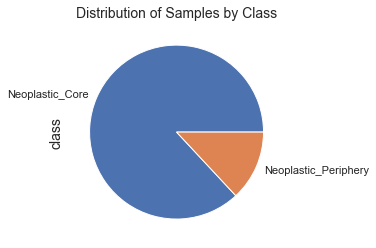

In [5]:
df['class'].value_counts().plot(kind='pie', title='Distribution of Samples by Class');

Abviously we have here class imbalance problem, the Neoplastic_Core Class Counts (386) equal almost seven times the Neoplastic_Periphery class Counts (58). 

# Solving Imbalanced Data Problem using Up-sampling Minority Class Technique

Up-sampling is the process of randomly duplicating observations from the minority class in order to reinforce its signal.

There are several heuristics for doing so, but the most common way is to simply resample with replacement.

First, we'll import the resampling module from Scikit-Learn:

Next, we'll create a new DataFrame with an up-sampled minority class. Here are the steps:

First, we'll separate observations from each class into different DataFrames.
Next, we'll resample the minority class with replacement, setting the number of samples to match that of the majority class.
Finally, we'll combine the up-sampled minority class DataFrame with the original majority class DataFrame.

In [6]:
#Upsampling all the minorities classes to the equal value of the majority class i.e. sample ='386'

from sklearn.utils import resample

df_Neoplastic_Core = resample(df[df['class']=='Neoplastic_Core'],
               replace=True,
               n_samples=386,
               random_state=123)

df_Neoplastic_Periphery = resample(df[df['class']=='Neoplastic_Periphery'],
               replace=True,
               n_samples=386,
               random_state=123)


df_upsampled = pd.concat([df_Neoplastic_Core, df_Neoplastic_Periphery])


# Display new class counts

df_upsampled['class'].value_counts()

Neoplastic_Core         386
Neoplastic_Periphery    386
Name: class, dtype: int64

In [7]:
features = df_upsampled.columns[:-1] 
X = df_upsampled[features].values
labels = df.columns[-1]
y = df_upsampled[labels].values

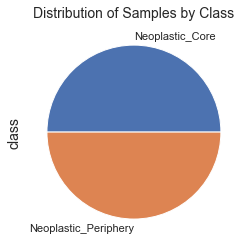

In [8]:
df_upsampled['class'].value_counts().plot(kind='pie', title='Distribution of Samples by Class');

Now after upsampling the minority class (Neoplastic_Periphery) we obtained 50/50 sample classes.

In [9]:
print(f'Feature Columns: {", ".join(features)}\nLabel Column: {labels}')

Feature Columns: class, 1/2-SBSRNA4, A1BG, A1BG-AS1, A1CF, A2LD1, A2M, A2ML1, A2MP1, A4GALT, A4GNT, AA06, AAA1, AAAS, AACS, AACSP1, AADAC, AADACL2, AADACL3, AADACL4, AADAT, AAGAB, AAK1, AAMP, AANAT, AARS, AARS2, AARSD1, AASDH, AASDHPPT, AASS, AATF, AATK, AATK-AS1, ABAT, ABCA1, ABCA10, ABCA11P, ABCA12, ABCA13, ABCA17P, ABCA2, ABCA3, ABCA4, ABCA5, ABCA6, ABCA7, ABCA8, ABCA9, ABCB1, ABCB10, ABCB11, ABCB4, ABCB5, ABCB6, ABCB7, ABCB8, ABCB9, ABCC1, ABCC10, ABCC11, ABCC12, ABCC13, ABCC2, ABCC3, ABCC4, ABCC5, ABCC6, ABCC6P1, ABCC6P2, ABCC8, ABCC9, ABCD1, ABCD2, ABCD3, ABCD4, ABCE1, ABCF1, ABCF2, ABCF3, ABCG1, ABCG2, ABCG4, ABCG5, ABCG8, ABHD1, ABHD10, ABHD11, ABHD11-AS1, ABHD12, ABHD12B, ABHD13, ABHD14A, ABHD14A-ACY1, ABHD14B, ABHD15, ABHD16A, ABHD16B, ABHD2, ABHD3, ABHD4, ABHD5, ABHD6, ABHD8, ABI1, ABI2, ABI3, ABI3BP, ABL1, ABL2, ABLIM1, ABLIM2, ABLIM3, ABO, ABP1, ABR, ABRA, ABT1, ABTB1, ABTB2, ACAA1, ACAA2, ACACA, ACACB, ACAD10, ACAD11, ACAD8, ACAD9, ACADL, ACADM, ACADS, ACADSB, ACADVL, ACA

We have balanced the unbalanced data to have a good accuracy rate.

# Split data into features and labels (X and y)

In [10]:
X = df.drop(['class'], axis=1)
y = df['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(333, 16383)
(333,)
(111, 16383)
(111,)


In [11]:
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [12]:
print(f'Total samples in dataset: {len(df)}\n')
unique, frequency = np.unique(y_train, return_counts = True)
print(f'Class distribution for {len(y_train)} training samples:')
print(f'Class\tCount\tPercent')
for u, f in zip(unique, frequency):
    print(f'{u:>5}\t{f:>5}\t{f/frequency.sum():.1%}')
print()
unique, frequency = np.unique(y_test, return_counts = True)
print(f'Class distribution for {len(y_test)} testing samples:')
print(f'Class\tCount\tPercent')
for u, f in zip(unique, frequency):
    print(f'{u:>5}\t{f:>5}\t{f/frequency.sum():.1%}')

Total samples in dataset: 444

Class distribution for 333 training samples:
Class	Count	Percent
Neoplastic_Core	  295	88.6%
Neoplastic_Periphery	   38	11.4%

Class distribution for 111 testing samples:
Class	Count	Percent
Neoplastic_Core	   91	82.0%
Neoplastic_Periphery	   20	18.0%


# Decision Tree

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [14]:
tree = DecisionTreeClassifier() # decision tree algorithm
tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [15]:
print(f'Decision tree has {tree.tree_.node_count} nodes with maximum depth {tree.tree_.max_depth}.') 
print(f'Model Accuracy: {tree.score(X_train, y_train)}')

Decision tree has 15 nodes with maximum depth 5.
Model Accuracy: 1.0


We have got 100 % model accuracy and the Decision tree has 15 nodes with maximum depth 5 which is perfect. 

In [16]:
y_pred = tree.predict(X_test) 
print(classification_report(y_test,y_pred))

                      precision    recall  f1-score   support

     Neoplastic_Core       0.90      0.97      0.93        91
Neoplastic_Periphery       0.77      0.50      0.61        20

            accuracy                           0.88       111
           macro avg       0.83      0.73      0.77       111
        weighted avg       0.87      0.88      0.87       111



We have got 88 % accuracy match between the true (unseen) and predicted cells classification of the Neoplastic_Core and the Neoplastic_Peripher Cells. We can call it good enough knowing that this result is pefore optimization.

# Decision Tree Paramaters Optimization Using Grid Search Cross Validation Algorithm

In [17]:
param_grid = {'max_depth': [25, 50, 100, 200, 300],
              'min_samples_leaf': [10, 20],
              'max_leaf_nodes': [25, 50, 100, 200, 300, 400, 500]}

In [18]:
gs_dt = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, n_jobs=-1)
gs_dt.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [25, 50, 100, 200, 300],
                         'max_leaf_nodes': [25, 50, 100, 200, 300, 400, 500],
                         'min_samples_leaf': [10, 20]})

In [19]:
print(f'The best model is: \n{gs_dt.best_estimator_}')

The best model is: 
DecisionTreeClassifier(max_depth=25, max_leaf_nodes=25, min_samples_leaf=10)


In [20]:
tree_opt = gs_dt.best_estimator_
print(f'Decision tree has {tree_opt.tree_.node_count} nodes with maximum depth {tree_opt.tree_.max_depth}.') 
print(f'Model Accuracy: {tree_opt.score(X_train, y_train)}')

Decision tree has 11 nodes with maximum depth 4.
Model Accuracy: 0.972972972972973


In [21]:
y_pred = tree_opt.predict(X_test) 
print(classification_report(y_test,y_pred))

                      precision    recall  f1-score   support

     Neoplastic_Core       0.90      0.98      0.94        91
Neoplastic_Periphery       0.83      0.50      0.62        20

            accuracy                           0.89       111
           macro avg       0.87      0.74      0.78       111
        weighted avg       0.89      0.89      0.88       111



We have got 89 % accuracy match between the true (unseen) and predicted cells classification of the Neoplastic_Core and the Neoplastic_Peripher Cells which is little better than out standard classification model (88%). We can call our optimized model is good enough after solving our data unbalanced problem by upsampling the minority class and optimizing our decision tree model using grid search cross validation algorithm.